In [9]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage.transform import resize
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import cv2

#About the LFW Dataset:

LFW is a dataset for face recognition. It contains grayscale images of faces of various people.
Each image is labeled with the name of the person. How People Can Use It: Researchers and developers can use the LFW dataset to train and test face recognition algorithms.
It's a standard benchmark for evaluating the performance of face recognition systems. It can be used to experiment with different machine learning models for facial recognition tasks.
Check the code bellow to undestand the dataset

Number of samples: 1288
Number of features: 1850
Number of classes: 7
Image dimensions: (1288, 50, 37)


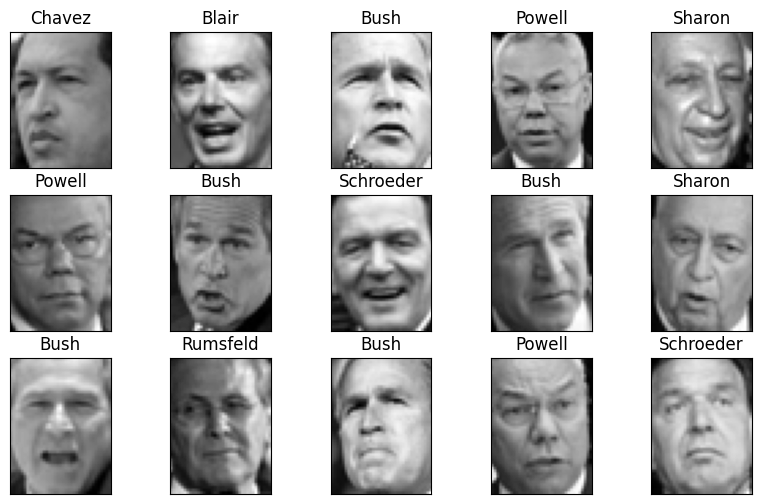

In [10]:

# Load the LFW-a dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Display some information about the dataset
print(f"Number of samples: {len(lfw_people.images)}")
print(f"Number of features: {lfw_people.data.shape[1]}")
print(f"Number of classes: {len(lfw_people.target_names)}")

# Check the dimensions of the images
print(f"Image dimensions: {lfw_people.images.shape}")

# Display some example images
fig, axes = plt.subplots(3, 5, figsize=(10, 6), subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes.ravel()):
    ax.imshow(lfw_people.images[i], cmap='gray')
    ax.set_title(lfw_people.target_names[lfw_people.target[i]].split()[-1])

plt.show()

# Data manipulation for Facial Recognition with CNN
The code bellow will fetch the LFW dataset for a deep learning model, particularly a CNN. It achieves this by partitioning the data into training and testing sets and applying standard preprocessing steps to both the images and labels.
It will bring only individuals with a ***minimum of 70 images***. Additionally, the images are resized to 40% of their original size. Divides the dataset into **training** and **testing** sets, with **80%** allocated for training and **20%** for testing. The random_state parameter ensures reproducibility. The ultimate objective is likely to train a deep learning model for facial recognition.

In [11]:
# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=5, resize=0.4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lfw_people.images, lfw_people.target, test_size=0.2, random_state=42)

# Preprocess the images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
X_test = X_test.astype('float32') / 255

# Preprocess the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## FIRST MODEL

### Model Architecture
- Convolutional layers with ReLU activation.
- MaxPooling layers for spatial reduction.
- Flatten layer for vectorization.
- Dense layers with ReLU and softmax activations.

### Training Configuration
- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Training with Data Augmentation (for increased robustness).

### Training Parameters
- Epochs: 10
- Batch Size: 8

### Model Evaluation
Test Accuracy: 9%




Epoch 1/10
598/598 [==============================] - 20s 28ms/step - loss: 5.6065 - accuracy: 0.0896 - val_loss: 5.5435 - val_accuracy: 0.0819
Epoch 2/10
598/598 [==============================] - 14s 24ms/step - loss: 5.4540 - accuracy: 0.0902 - val_loss: 5.5434 - val_accuracy: 0.0819
Epoch 3/10
598/598 [==============================] - 14s 23ms/step - loss: 5.4429 - accuracy: 0.0902 - val_loss: 5.5352 - val_accuracy: 0.0819
Epoch 4/10
598/598 [==============================] - 15s 24ms/step - loss: 5.4420 - accuracy: 0.0902 - val_loss: 5.5338 - val_accuracy: 0.0819
Epoch 5/10
598/598 [==============================] - 14s 24ms/step - loss: 5.4348 - accuracy: 0.0902 - val_loss: 5.5359 - val_accuracy: 0.0819
Epoch 6/10
598/598 [==============================] - 15s 24ms/step - loss: 5.4335 - accuracy: 0.0902 - val_loss: 5.5382 - val_accuracy: 0.0819
Epoch 7/10
598/598 [==============================] - 14s 24ms/step - loss: 5.4336 - accuracy: 0.0902 - val_loss: 5.5323 - val_accuracy:

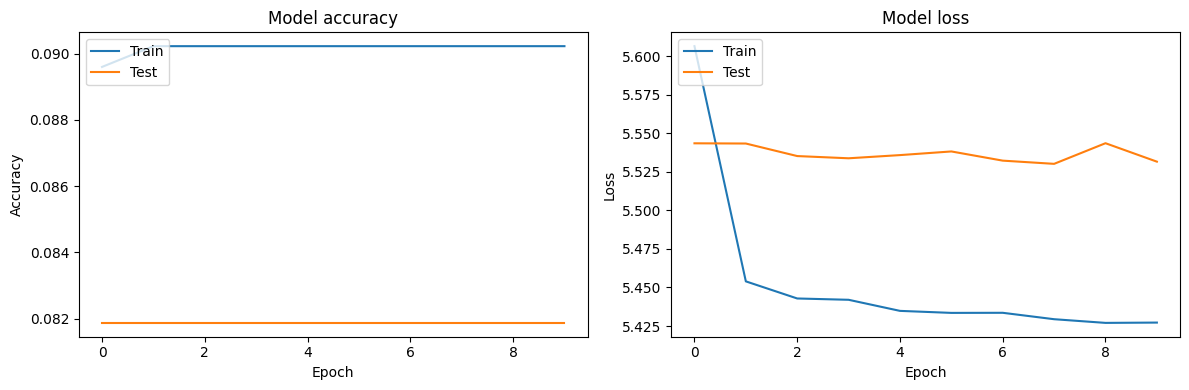

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Build the first model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 37, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Reshape input data to fit the ImageDataGenerator
X_train_augmented = X_train.reshape((-1, 50, 37, 1))

# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train_augmented, y_train, batch_size=8),
                    steps_per_epoch=len(X_train_augmented) / 8,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Plot the results
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()





#NOTES FOR LEARNING
# ### Arquitetura do Modelo:
# 1. **Camadas Convolucionais com Ativação ReLU:**
#    - **O que faz:** Procura padrões nas imagens usando pequenos filtros.
#    - **Por que é usado:** Ajuda a extrair características importantes das imagens.

# 2. **Camadas MaxPooling para Redução Espacial:**
#    - **O que faz:** Reduz o tamanho das imagens, mantendo as características mais importantes.
#    - **Por que é usado:** Torna o modelo mais eficiente e reduz o número de parâmetros.

# 3. **Camada Flatten para Vetorização:**
#    - **O que faz:** Transforma a saída das camadas anteriores em um vetor.
#    - **Por que é usado:** Prepara os dados para as camadas totalmente conectadas.

# 4. **Camadas Densas com Ativações ReLU e Softmax:**
#    - **O que faz:** Realiza operações mais complexas para a classificação final.
#    - **Por que é usado:** Captura relações mais complexas nos dados e produz probabilidades para cada classe.

# ### Configuração de Treinamento:
#    - **Otimizador: Adam**
#      - **O que faz:** Ajusta os pesos do modelo durante o treinamento.
#      - **Por que é usado:** Otimiza o treinamento de maneira eficiente.

#    - **Função de Perda: Entropia Categórica Cruzada**
#      - **O que faz:** Mede a diferença entre as previsões do modelo e as verdadeiras classes.
#      - **Por que é usado:** Guia o treinamento para melhorar as previsões.

#    - **Treinamento com Augmentação de Dados (para Maior Robustez)**
#      - **O que faz:** Aumenta artificialmente a diversidade dos dados de treinamento.
#      - **Por que é usado:** Ajuda o modelo a lidar melhor com diferentes variações nas imagens.

# ### Parâmetros de Treinamento:
#    - **Épocas: 10**
#      - **O que faz:** Define quantas vezes o modelo verá todo o conjunto de treinamento.
#      - **Por que é usado:** Quanto mais épocas, mais oportunidades o modelo tem para aprender.

#    - **Tamanho do Lote: 8**
#      - **O que faz:** Determina quantos exemplos de treinamento são usados em uma iteração.
#      - **Por que é usado:** Ajuda no treinamento eficiente e pode regularizar o modelo.



#NOTES FOR LEARNING
# ### Arquitetura do Modelo:
# 1. **Camadas Convolucionais com Ativação ReLU:**
#    - **O que faz:** Procura padrões nas imagens usando pequenos filtros.
#    - **Por que é usado:** Ajuda a extrair características importantes das imagens.

# 2. **Camadas MaxPooling para Redução Espacial:**
#    - **O que faz:** Reduz o tamanho das imagens, mantendo as características mais importantes.
#    - **Por que é usado:** Torna o modelo mais eficiente e reduz o número de parâmetros.

# 3. **Camada Flatten para Vetorização:**
#    - **O que faz:** Transforma a saída das camadas anteriores em um vetor.
#    - **Por que é usado:** Prepara os dados para as camadas totalmente conectadas.

# 4. **Camadas Densas com Ativações ReLU e Softmax:**
#    - **O que faz:** Realiza operações mais complexas para a classificação final.
#    - **Por que é usado:** Captura relações mais complexas nos dados e produz probabilidades para cada classe.

# ### Configuração de Treinamento:
#    - **Otimizador: Adam**
#      - **O que faz:** Ajusta os pesos do modelo durante o treinamento.
#      - **Por que é usado:** Otimiza o treinamento de maneira eficiente.

#    - **Função de Perda: Entropia Categórica Cruzada**
#      - **O que faz:** Mede a diferença entre as previsões do modelo e as verdadeiras classes.
#      - **Por que é usado:** Guia o treinamento para melhorar as previsões.

#    - **Treinamento com Augmentação de Dados (para Maior Robustez)**
#      - **O que faz:** Aumenta artificialmente a diversidade dos dados de treinamento.
#      - **Por que é usado:** Ajuda o modelo a lidar melhor com diferentes variações nas imagens.

# ### Parâmetros de Treinamento:
#    - **Épocas: 10**
#      - **O que faz:** Define quantas vezes o modelo verá todo o conjunto de treinamento.
#      - **Por que é usado:** Quanto mais épocas, mais oportunidades o modelo tem para aprender.

#    - **Tamanho do Lote: 8**
#      - **O que faz:** Determina quantos exemplos de treinamento são usados em uma iteração.
#      - **Por que é usado:** Ajuda no treinamento eficiente e pode regularizar o modelo.


#SECOND MODEL
Training Configuration

Optimizer: Adam

Loss Function: Categorical Crossentropy

Training with Data Augmentation: No

Training Parameters

Epochs: 10

Batch Size: 8

Model Evaluation

This time we added mor dense layers

Test Accuracy: 9%


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 35, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 24, 17, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 15, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 11, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 5, 128)         73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 2, 128)        

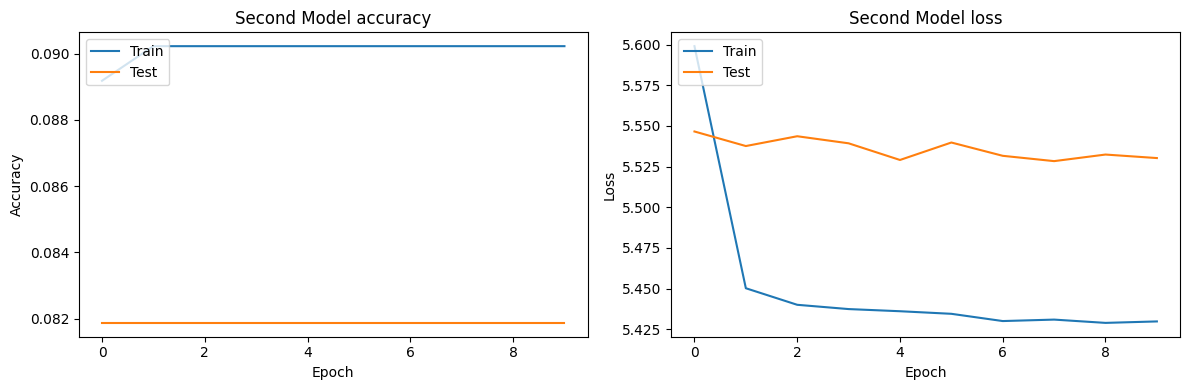

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the Second_model without data augmentation
Second_model = Sequential()
Second_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
Second_model.add(MaxPooling2D((2, 2)))
Second_model.add(Conv2D(64, (3, 3), activation='relu'))
Second_model.add(MaxPooling2D((2, 2)))
Second_model.add(Conv2D(128, (3, 3), activation='relu'))
Second_model.add(MaxPooling2D((2, 2)))
Second_model.add(Flatten())
Second_model.add(Dense(128, activation='relu'))
Second_model.add(Dense(256, activation='relu'))
Second_model.add(Dense(512, activation='relu'))
Second_model.add(Dense(256, activation='relu'))
Second_model.add(Dense(128, activation='relu'))
Second_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the Second_model
Second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the Second_model summary
Second_model.summary()

# Train the Second_model without data augmentation
history_second = Second_model.fit(X_train, y_train,
                                  epochs=10,
                                  batch_size=8,
                                  validation_data=(X_test, y_test))

# Plot the training history for Second_model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_second.history['accuracy'])
plt.plot(history_second.history['val_accuracy'])
plt.title('Second Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_second.history['loss'])
plt.plot(history_second.history['val_loss'])
plt.title('Second Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/10
17/17 [==============================] - 7s 231ms/step - loss: 1.8067 - accuracy: 0.3718 - val_loss: 1.6227 - val_accuracy: 0.4612
Epoch 2/10
17/17 [==============================] - 4s 209ms/step - loss: 1.7185 - accuracy: 0.3990 - val_loss: 1.5944 - val_accuracy: 0.4612
Epoch 3/10
17/17 [==============================] - 3s 204ms/step - loss: 1.7246 - accuracy: 0.3990 - val_loss: 1.6016 - val_accuracy: 0.4612
Epoch 4/10
17/17 [==============================] - 4s 228ms/step - loss: 1.7164 - accuracy: 0.3990 - val_loss: 1.6032 - val_accuracy: 0.4612
Epoch 5/10
17/17 [==============================] - 4s 216ms/step - loss: 1.7115 - accuracy: 0.3990 - val_loss: 1.6288 - val_accuracy: 0.4612
Epoch 6/10
17/17 [==============================] - 4s 263ms/step - loss: 1.7037 - accuracy: 0.3990 - val_loss: 1.5930 - val_accuracy: 0.4612
Epoch 7/10
17/17 [==============================] - 6s 384ms/step - loss: 1.7066 - accuracy: 0.3990 - val_loss: 1.6211 - val_accuracy: 0.4612
Epoch 

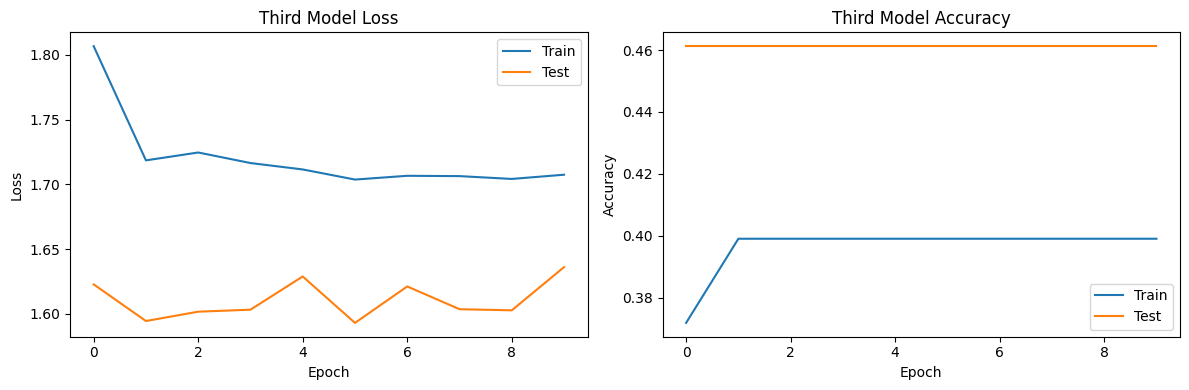

The improvements in the Third_model that might contribute to better validation accuracy include input normalization, a fixed input shape, and larger batch size. The fixed input shape allows the model to learn more meaningful features from the images, and input normalization helps in stabilizing and accelerating the training process.


In [14]:

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

# Preprocess the data
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)).astype('float32') / 255
y = to_categorical(y)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the thrid_model
Third_model = models.Sequential()
Third_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 37, 1)))
Third_model.add(layers.MaxPooling2D((2, 2)))
Third_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
Third_model.add(layers.MaxPooling2D((2, 2)))
Third_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
Third_model.add(layers.Flatten())
Third_model.add(layers.Dense(256, activation='relu'))
Third_model.add(layers.Dense(512, activation='relu'))
Third_model.add(layers.Dense(256, activation='relu'))
Third_model.add(layers.Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
Third_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history = Third_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Third Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Third Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()
print('''The improvements in the Third_model that might contribute to better validation accuracy include input normalization, a fixed input shape, and larger batch size. The fixed input shape allows the model to learn more meaningful features from the images, and input normalization helps in stabilizing and accelerating the training process.''')


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 47, 34, 128)       2176      
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 23, 17, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 21, 15, 128)       147584    
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 10, 7, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 8, 5, 256)         295168    
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 4, 2, 256)       

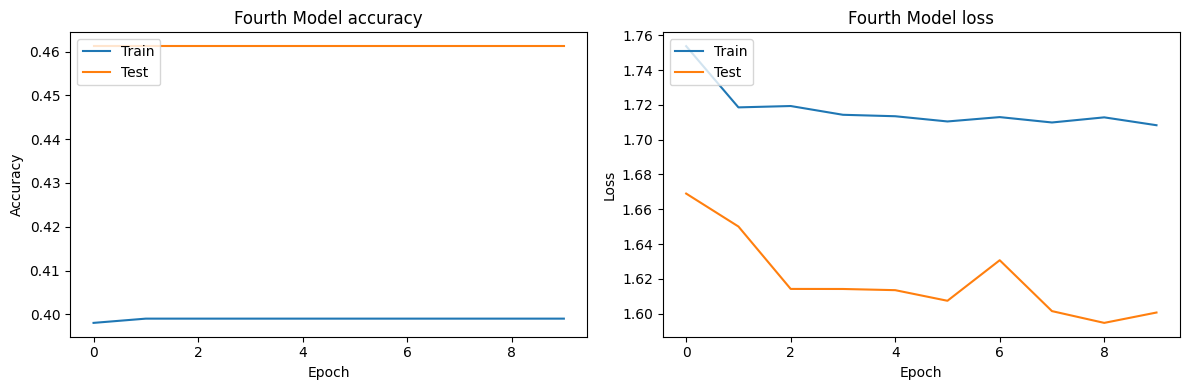

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

# Preprocess the data
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)).astype('float32') / 255
y = to_categorical(y)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Fourth_model
Fourth_model = Sequential()
Fourth_model.add(Conv2D(128, (4, 4), activation='relu', input_shape=(50, 37, 1)))
Fourth_model.add(MaxPooling2D((2, 2)))
Fourth_model.add(Conv2D(128, (3, 3), activation='relu'))
Fourth_model.add(MaxPooling2D((2, 2)))
Fourth_model.add(Conv2D(256, (3, 3), activation='relu'))
Fourth_model.add(MaxPooling2D((2, 2)))
Fourth_model.add(Flatten())
Fourth_model.add(Dense(512, activation='relu'))  # Adjusted size
Fourth_model.add(Dropout(0.2))  # Adding dropout for regularization
Fourth_model.add(Dense(256, activation='relu'))
Fourth_model.add(Dropout(0.2))  # Adding dropout for regularization
Fourth_model.add(Dense(128, activation='relu'))
Fourth_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
Fourth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the Fourth_model summary
Fourth_model.summary()

# Train the Fourth_model
history_fourth = Fourth_model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(test_images, test_labels))

# Plot the training history for Fourth_model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_fourth.history['accuracy'])
plt.plot(history_fourth.history['val_accuracy'])
plt.title('Fourth Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_fourth.history['loss'])
plt.plot(history_fourth.history['val_loss'])
plt.title('Fourth Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

# Preprocess the data
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1)).astype('float32') / 255
y = to_categorical(y)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Fith_model
Fith_model = Sequential()
Fith_model.add(Conv2D(256, (5, 5), activation='relu', input_shape=(50, 37, 1), padding='same'))
Fith_model.add(MaxPooling2D((2, 2)))
Fith_model.add(Conv2D(512, (3, 3), activation='elu', padding='same'))
Fith_model.add(MaxPooling2D((2, 2)))
Fith_model.add(Conv2D(512, (3, 3), activation='tanh', padding='same'))
Fith_model.add(MaxPooling2D((2, 2)))
Fith_model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
Fith_model.add(MaxPooling2D((2, 2)))
Fith_model.add(Conv2D(1024, (3, 3), activation='elu', padding='same'))
Fith_model.add(MaxPooling2D((2, 2)))
Fith_model.add(Conv2D(2048, (3, 3), activation='relu', padding='same'))
Fith_model.add(MaxPooling2D((1, 1)))  # Adjusted pool size
Fith_model.add(Flatten())
Fith_model.add(Dense(1024, activation='relu'))
Fith_model.add(Dropout(0.3))
Fith_model.add(Dense(512, activation='tanh'))
Fith_model.add(Dropout(0.3))
Fith_model.add(Dense(256, activation='elu'))
Fith_model.add(Dropout(0.3))
Fith_model.add(Dense(len(lfw_people.target_names), activation='softmax'))

# Compile the model
Fith_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the Fith_model summary
Fith_model.summary()

# Train the Fith_model
history_fith = Fith_model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(test_images, test_labels))

# Plot the training history for Fith_model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_fith.history['accuracy'])
plt.plot(history_fith.history['val_accuracy'])
plt.title('Fith Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_fith.history['loss'])
plt.plot(history_fith.history['val_loss'])
plt.title('Fith Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 50, 37, 256)       6656      
                                                                 
 max_pooling2d_95 (MaxPooli  (None, 25, 18, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 25, 18, 512)       1180160   
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 12, 9, 512)        0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, 12, 9, 512)        2359808   
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 6, 4, 512)       

KeyboardInterrupt: 